<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [83]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [84]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [85]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("titanic.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [86]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df_copy = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df_copy.shape

(891, 6)

In [88]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df_copy = df_copy.dropna()

In [89]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar
df_copy.shape

(714, 6)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [90]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [91]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o no
survived_count = df_copy['Survived'].value_counts()
print(survived_count)

Survived
0    424
1    290
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

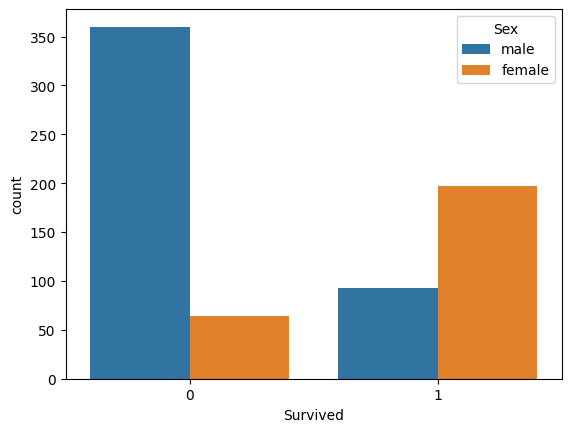

In [92]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(x='Survived', hue='Sex', data=df_copy)

<Axes: xlabel='Pclass', ylabel='count'>

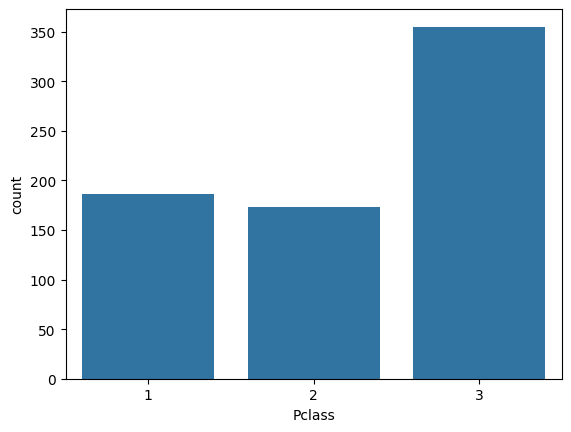

In [93]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
sns.countplot(x='Pclass', data=df_copy)

<Axes: xlabel='Pclass', ylabel='count'>

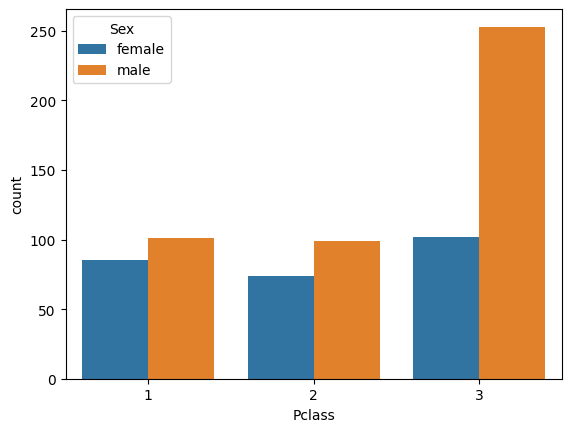

In [94]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(x='Pclass', hue='Sex', data=df_copy)

#### Transformar variables categóricas texto a clases numeradas

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df_copy.copy()

In [97]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
le = LabelEncoder()
df_cod['Sex'] = le.fit_transform(df_cod['Sex'])

In [98]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
print(le.classes_)

['female' 'male']


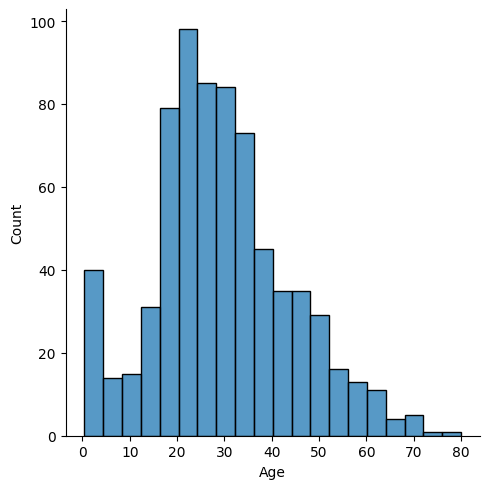

In [99]:
# Alumno: Analizar la distribución de la edad
sns.displot(data=df_cod, x='Age')

In [100]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cod.loc[:, 'Age'] = scaler.fit_transform(df_cod[['Age']])

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [101]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X = df_cod.drop('Survived', axis=1).values
y = df_cod['Survived'].values

In [102]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape
in_shape = X.shape[1]

In [103]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea
out_shape = 1

In [104]:
in_shape

5

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [105]:
# Alumno, generar los dataset de train y test superando en 80%20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
from keras.layers import Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta
def create_model(input_size, hidden_neurons, output_size):
  model = Sequential()
  model.add(Dense(units=hidden_neurons, activation='sigmoid', input_shape=(input_size,)))
  model.add(Dense(units=output_size, activation='sigmoid'))
  return model

In [107]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"
model = create_model(in_shape, 1024, out_shape)
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer="Adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1024)              6144      
                                                                 
 dense_15 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 7169 (28.00 KB)
Trainable params: 7169 (28.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Almacenar la salida del fit en una variable "history"
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=50, batch_size=32)

Epoch 1/50
15/15 [==============================] - 1s 18ms/step - loss: 0.6838 - accuracy: 0.6294 - val_loss: 0.6994 - val_accuracy: 0.5478
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.6492 - accuracy: 0.6491 - val_loss: 0.6411 - val_accuracy: 0.7130
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 0.6201 - accuracy: 0.6513 - val_loss: 0.6198 - val_accuracy: 0.7217
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5945 - accuracy: 0.7171 - val_loss: 0.6064 - val_accuracy: 0.6696
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5671 - accuracy: 0.7522 - val_loss: 0.5832 - val_accuracy: 0.7391
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5485 - accuracy: 0.7697 - val_loss: 0.5768 - val_accuracy: 0.7130
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5311 - accuracy: 0.7982 - val_loss: 0.5758 - val_accuracy: 0.7217
Epoch 8/50
15/15 [=

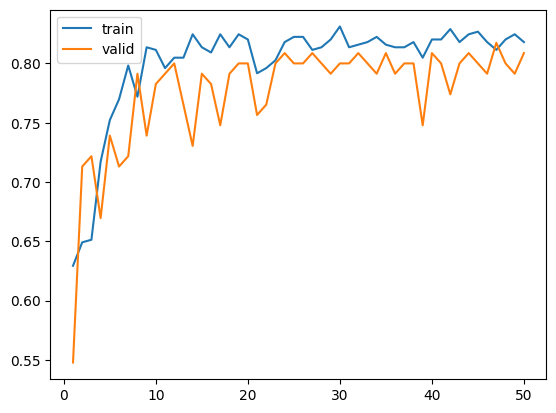

In [109]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line
epocas_conteo = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epocas_conteo,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epocas_conteo,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [110]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test
y_hat_prob = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [111]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat
y_hat = [1 if x >= 0.5 else 0 for x in y_hat_prob]

In [112]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1024)              6144      
                                                                 
 dense_15 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 7169 (28.00 KB)
Trainable params: 7169 (28.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [113]:
# Alumno, calcular la exactitud (accuracy) de su modelo
scores = model.evaluate(X_test, y_test)
scores[1]

5/5 [==============================] - 0s 4ms/step - loss: 0.5134 - accuracy: 0.7343


0.7342657446861267

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.7342657342657343

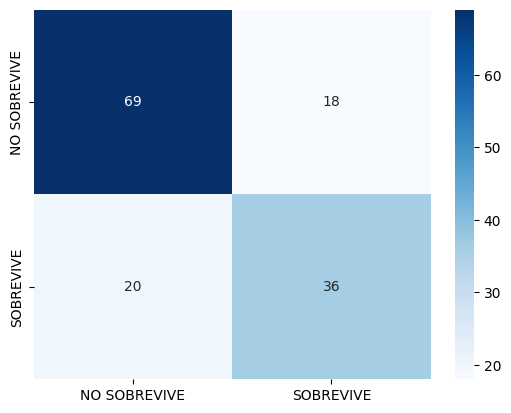

In [115]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['NO SOBREVIVE', 'SOBREVIVE'], yticklabels=['NO SOBREVIVE', 'SOBREVIVE'])
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [116]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo